In [4]:
#lets import libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:
# lets read the data set

In [7]:
df=pd.read_csv(r"C:\Users\user\Desktop\internship\car data.csv")

In [8]:
df.shape

(301, 9)

In [9]:
#lets check head of the data set
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
# lets check the missing values in the dataset
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
# lets check the descriptive summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
#lets check categorical data

In [13]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [14]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [15]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [16]:
# lets visualize the distribution Fuel type,Seller type and Trasmission

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


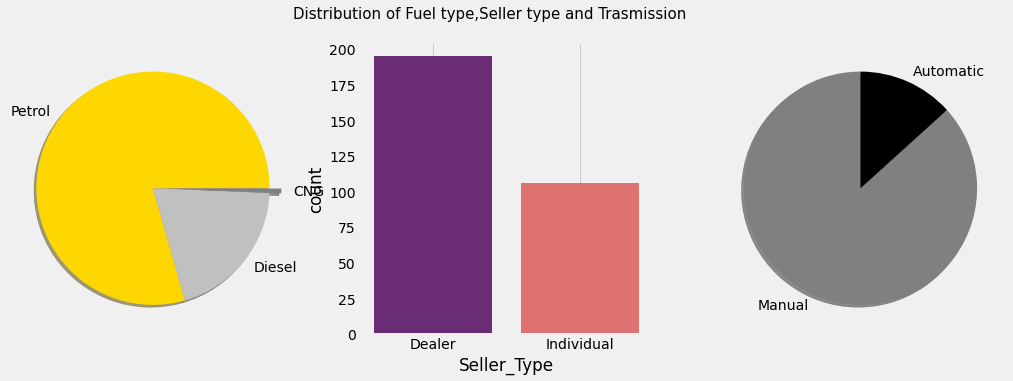

In [17]:
plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('fivethirtyeight')
plt.subplot(1, 3, 1)
plt.pie(df['Fuel_Type'].value_counts().values,
        labels = df['Fuel_Type'].value_counts().index,
        colors = ['gold','silver','grey'],
        startangle = 0,
        shadow = True,
       explode=[0,0,0.1])

plt.subplot(1, 3, 2)
sns.countplot(df['Seller_Type'], palette = 'magma')
plt.grid()

plt.subplot(1, 3, 3)
plt.pie(df['Transmission'].value_counts().values,
        labels = df['Transmission'].value_counts().index,
        colors = ['grey','black'],
        startangle = 90,
        shadow = True)
plt.suptitle('Distribution of Fuel type,Seller type and Trasmission', fontsize = 15)
plt.show()

In [18]:
# Encoding the categorical data

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def encode(data):
    for i in data.columns:
        if  data[i].dtypes=="object":
            data[i]=le.fit_transform(data[i])
    return data
df=encode(df)
            

In [20]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,2016,9.50,11.60,33988,1,0,1,0
297,66,2015,4.00,5.90,60000,2,0,1,0
298,69,2009,3.35,11.00,87934,2,0,1,0
299,69,2017,11.50,12.50,9000,1,0,1,0


In [21]:
# lets check skewness of the data

In [22]:
df.skew()

Car_Name        -0.832386
Year            -1.246189
Selling_Price    2.493422
Present_Price    4.083150
Kms_Driven       6.436013
Fuel_Type       -1.669601
Seller_Type      0.622146
Transmission    -2.173776
Owner            7.616850
dtype: float64

In [ ]:
# removing of skewness

In [23]:
from sklearn.preprocessing import power_transform
x=df.drop(["Car_Name","Selling_Price"],axis=1)
y=df["Selling_Price"]
def rm_skew(data):
    array=power_transform(data)
    data=pd.DataFrame(array,columns=data.columns)
    return data


In [24]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0
297,2015,5.90,60000,2,0,1,0
298,2009,11.00,87934,2,0,1,0
299,2017,12.50,9000,1,0,1,0


In [28]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [31]:
df=pd.concat([x,y],axis=1)

In [32]:
df

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,2014,5.59,27000,2,0,1,0,3.35
1,2013,9.54,43000,1,0,1,0,4.75
2,2017,9.85,6900,2,0,1,0,7.25
3,2011,4.15,5200,2,0,1,0,2.85
4,2014,6.87,42450,1,0,1,0,4.60
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0,9.50
297,2015,5.90,60000,2,0,1,0,4.00
298,2009,11.00,87934,2,0,1,0,3.35
299,2017,12.50,9000,1,0,1,0,11.50


In [ ]:
#remove outliers

In [33]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 18,  35,  37,  39,  51,  58,  59,  59,  62,  63,  63,  64,  64,
         77,  82,  84,  85,  86,  86,  93,  96, 106, 179, 184, 191, 192,
        193, 196, 198, 201, 205, 241], dtype=int64),
 array([3, 3, 0, 0, 7, 6, 1, 7, 1, 1, 7, 1, 7, 0, 7, 2, 6, 1, 7, 7, 7, 6,
        2, 6, 6, 6, 6, 2, 6, 6, 6, 6], dtype=int64))

In [34]:
new=df[(z<3).all(axis=1)]

In [35]:
new

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,2014,5.59,27000,2,0,1,0,3.35
1,2013,9.54,43000,1,0,1,0,4.75
2,2017,9.85,6900,2,0,1,0,7.25
3,2011,4.15,5200,2,0,1,0,2.85
4,2014,6.87,42450,1,0,1,0,4.60
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0,9.50
297,2015,5.90,60000,2,0,1,0,4.00
298,2009,11.00,87934,2,0,1,0,3.35
299,2017,12.50,9000,1,0,1,0,11.50


In [36]:
# lets form dependent and independent sets

y = new['Selling_Price']
x = new.drop(['Selling_Price'], axis = 1)

print(y.shape)
print(x.columns)

(273,)
Index(['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')


In [37]:
# lets perform train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(218, 7)
(55, 7)
(218,)
(55,)


In [38]:
# lets perform standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
#model training

# 1.RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor()
model1.fit(x_train, y_train)



RMSE Score : 0.7678001257429626
R2 Score : 0.9467437464938472


In [51]:
# prediction on Training data
training_data_prediction = model1.predict(x_train)

In [54]:
# lets check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_train , training_data_prediction)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_train , training_data_prediction)
print("R2 Score :",r2_score)

RMSE Score : 0.30295767258174294
R2 Score : 0.9935581080614994


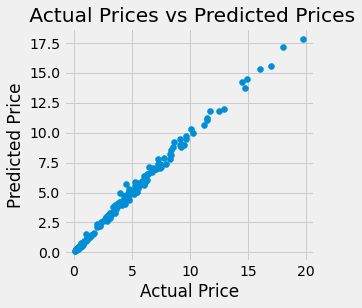

In [56]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [60]:
# prediction on testing data

In [61]:
y_pred1 = model1.predict(x_test)

# lets check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, y_pred1)
print("R2 Score :",r2_score)

RMSE Score : 0.7678001257429626
R2 Score : 0.9467437464938472


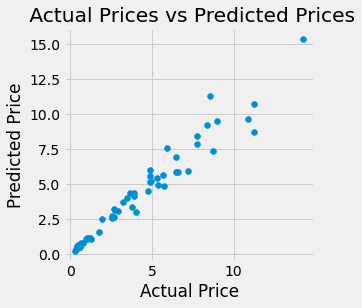

In [62]:
plt.scatter(y_test, y_pred1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# GradientBoostingRegressor

In [63]:
# lets create a Gradient Boosting Model

from sklearn.ensemble import GradientBoostingRegressor

model2 = GradientBoostingRegressor()
model2.fit(x_train, y_train)


GradientBoostingRegressor()

In [64]:
# prediction on Training data
training_data_prediction2 = model2.predict(x_train)

In [65]:
# lets check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_train , training_data_prediction2)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_train , training_data_prediction2)
print("R2 Score :",r2_score)

RMSE Score : 0.2440002868622423
R2 Score : 0.9958214057942611


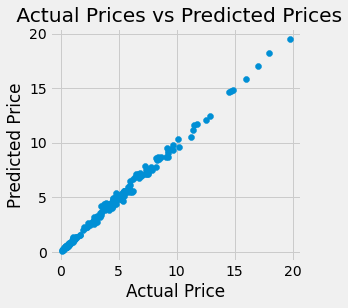

In [66]:
plt.scatter(y_train, training_data_prediction2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [70]:
# accuracy of testing data

In [67]:
y_pred2 = model2.predict(x_test)
# lets check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, y_pred2)
print("R2 Score :",r2_score)

RMSE Score : 0.7033581813330584
R2 Score : 0.9553082520958988


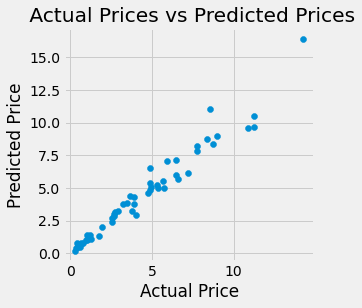

In [68]:
plt.scatter(y_test, y_pred2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [69]:
# comparizon of two model

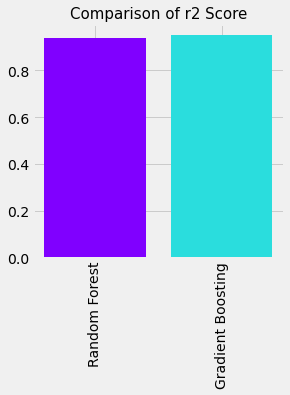

In [48]:
r2_score = np.array([ 0.94, 0.95])
labels = np.array([ 'Random Forest' 'Gradient Boosting'])
index = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 4))

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (4, 4)

plt.bar(range(len(index)), r2_score[index], color = color)
plt.xticks(range(0, 2), [ 'Random Forest','Gradient Boosting'], rotation = 90)
plt.title('Comparison of r2 Score', fontsize = 15)
plt.show()

In [72]:
# from above camparizon we can conclude that Gradient Boosting model is best fitted for car value prediction